<a href="https://colab.research.google.com/github/CarolWuuu/SuperHero_SQLite/blob/main/superhero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import sqlite3
import pandas as pd

In [12]:
# create and connect to SQLite db
conn = sqlite3.connect("superhero_db.sqlite")
cursor = conn.cursor()

In [13]:
# define db schema
ddl_statements = '''
DROP TABLE IF EXISTS heros;
DROP TABLE IF EXISTS villains;
DROP TABLE IF EXISTS battles;

CREATE TABLE heros (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  power TEXT NOT NULL,
  team TEXT NOT NULL
);

CREATE TABLE villains (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  evil_plan TEXT NOT NULL
);

CREATE TABLE battles (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  hero_id INTEGER,
  villain_id INTEGER,
  outcome TEXT NOT NULL,
  FOREIGN KEY (hero_id) REFERENCES heroes(id),
  FOREIGN KEY (villain_id) REFERENCES villains(id)
);
'''

# execute statement
cursor.executescript(ddl_statements)
conn.commit()


In [15]:
# Load data from CSVs and insert into tables
heroes_df = pd.read_csv("heroes.csv")
villains_df = pd.read_csv("villains.csv")
battles_df = pd.read_csv("battles.csv")

heroes_df.to_sql("heroes", conn, if_exists="append", index=False)
villains_df.to_sql("villains", conn, if_exists="append", index=False)
battles_df.to_sql("battles", conn, if_exists="append", index=False)

# Verify data insertion
print("Heroes:")
print(pd.read_sql("SELECT * FROM heroes LIMIT 5", conn))
print("\nVillains:")
print(pd.read_sql("SELECT * FROM villains LIMIT 5", conn))
print("\nBattles:")
print(pd.read_sql("SELECT * FROM battles LIMIT 5", conn))

Heroes:
   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers

Villains:
   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him

Battles:
   id  hero_id  villain_id       outcome
0   1        1          10  Villain Wins
1   2        9           3     Hero Wins
2   3        8           1          Draw
3   4        5           4  Villain Wins
4   5        1           7     Hero Wins


In [16]:
# SQL queries
# Retrieve all superheroes and their powers.
print('All heroes and their powers:')
for row in cursor.execute('SELECT name, power FROM heroes'):
  print(row)

All heroes and their powers:
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')


In [18]:
# Find all battles where the hero won.
print('All battles where the hero won:')
cursor.execute('''
  SELECT * FROM Battles
  WHERE outcome = "Hero Wins"
''')
for row in cursor.fetchall():
  print(row)

All battles where the hero won:
(2, 9, 3, 'Hero Wins')
(5, 1, 7, 'Hero Wins')
(7, 9, 8, 'Hero Wins')
(8, 3, 2, 'Hero Wins')
(9, 7, 5, 'Hero Wins')
(13, 8, 9, 'Hero Wins')
(20, 3, 4, 'Hero Wins')
(29, 3, 5, 'Hero Wins')
(30, 5, 5, 'Hero Wins')


In [19]:
# Retrieve all villains and their evil plans.
print('All villains and their evil plans:')
for row in cursor.execute('SELECT name, evil_plan FROM villains'):
  print(row)

All villains and their evil plans:
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('Red Skull', 'Revive Hydra')


In [21]:
# Determine which superhero has fought the most battles
print('Superhero who has fought the most battles:')
cursor.execute('''
  SELECT heroes.name, COUNT(battles.id) AS battle_count FROM battles
  JOIN heroes ON battles.hero_id = heroes.id
  GROUP BY heroes.name
  ORDER BY battle_count DESC LIMIT 1;
''')
for row in cursor.fetchall():
  print(row)

Superhero who has fought the most battles:
('Batman', 7)


In [29]:
# Custome feature table
statement = '''
  DROP TABLE hideouts;
  CREATE TABLE IF NOT EXISTS hideouts (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  villain_id INTEGER,
  location TEXT NOT NULL,
  security_level TEXT NOT NULL,
  FOREIGN KEY (villain_id) REFERENCES villains(id)
);
'''

cursor.executescript(statement)
conn.commit()


In [30]:
# insert villain hideouts data
hideout_array = [
  (1, 1, 'Goblin Glider Base', 'High'),
  (2, 2, 'Sanctum Sanctorum (Stark Tower)', 'Extreme'),
  (3, 3, 'Arkham Asylum', 'Medium'),
  (4, 4, 'LexCorp Tower', 'High'),
  (5, 5, 'Asgardian Vault', 'Extreme'),
  (6, 6, 'AI Cloud Network', 'Extreme'),
  (7, 7, 'Apokolips Throne Room', 'Extreme'),
  (8, 8, 'Venom’s Lair in the Sewers', 'Medium'),
  (9, 9, 'Magneto’s Mutant Island', 'High'),
  (10, 10,'Hydra Base in the Arctic', 'High')
]

cursor.executemany('''
    INSERT INTO hideouts (id, villain_id, location, security_level)
    VALUES (?, ?, ?, ?)
''', hideout_array)

conn.commit()

In [31]:
# Retrieve all villains and their hideout locations
print('All villains and their hideout locations:')
cursor.execute('''
  SELECT villains.name, hideouts.location FROM hideouts
  JOIN villains ON hideouts.villain_id = villains.id;
''')
for row in cursor.fetchall():
  print(row)

All villains and their hideout locations:
('Green Goblin', 'Goblin Glider Base')
('Thanos', 'Sanctum Sanctorum (Stark Tower)')
('Joker', 'Arkham Asylum')
('Lex Luthor', 'LexCorp Tower')
('Loki', 'Asgardian Vault')
('Ultron', 'AI Cloud Network')
('Darkseid', 'Apokolips Throne Room')
('Venom', 'Venom’s Lair in the Sewers')
('Magneto', 'Magneto’s Mutant Island')
('Red Skull', 'Hydra Base in the Arctic')


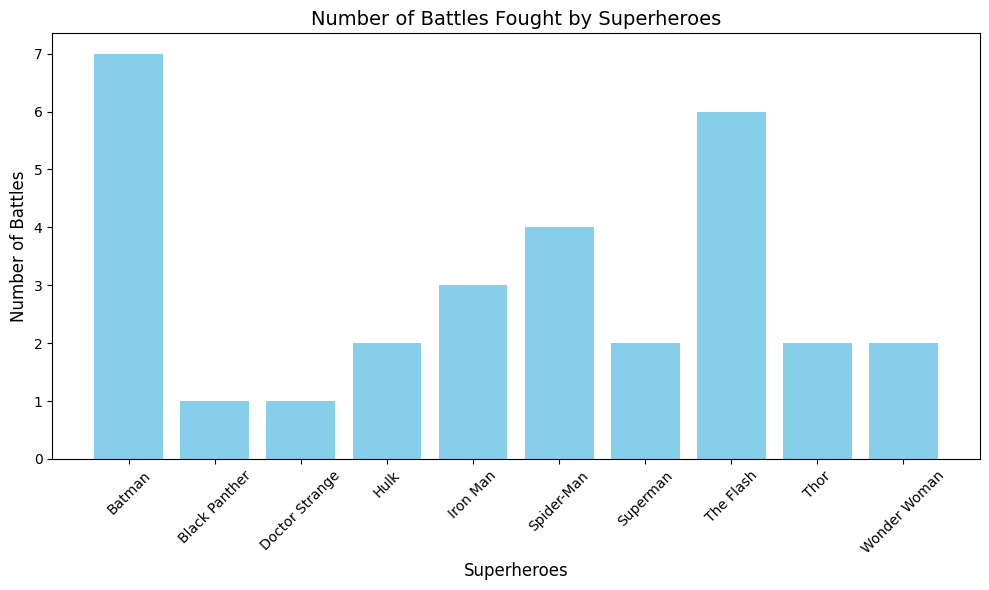

In [33]:
# Bonus

import matplotlib.pyplot as plt
cursor.execute('''
  SELECT heroes.name, COUNT(battles.id) AS battle_count FROM battles
  JOIN heroes ON battles.hero_id = heroes.id
  GROUP BY heroes.name;
''')
data = cursor.fetchall()

heroes = [row[0] for row in data]
battles = [row[1] for row in data]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(heroes, battles, color='skyblue')

# Adding titles and labels
plt.title('Number of Battles Fought by Superheroes', fontsize=14)
plt.xlabel('Superheroes', fontsize=12)
plt.ylabel('Number of Battles', fontsize=12)

# Display the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()